In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
import cv2
import os

IMAGES_PATH = 'Image'
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
def load_images(path, size=(100,100)):
    X, y = [], []
    paths = []
    for person in os.listdir(path):
        folder = os.path.join(path, person)
        for file in os.listdir(folder):
            img = cv2.imread(os.path.join(folder, file), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, size)
            X.append(img.flatten())
            y.append(person)
            paths.append(os.path.join(folder,file))
    return np.array(X), np.array(y),paths 

In [3]:
X,y,paths = load_images('Datasets/archive')

GIẢM CHIỀU DỮ LIỆU BẰNG PCA 

In [4]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance = None
    def fit(self,X):
        # normalize data
        self.mean = np.mean(X,axis = 0)
        X_centered = X - self.mean

        # Using Singular Value Decomposition
        U,S,V_t = np.linalg.svd(X_centered,full_matrices=True)

        # Get K-Principal components
        self.components = V_t[:self.n_components]

        # Explain variances
        n_samples = X.shape[0] 
        self.explained_variance = (S**2)/(n_samples-1)
    
    def transform(self,X):
        X_centered = X - self.mean
        return np.dot(X_centered,self.components.T)
 
    def fit_transform(self,X):
        self.fit(X)
        return self.transform(X)
    
    def recontruct_image(self,X):
        return X @ self.components + self.mean
        


In [5]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
print("Kích thước sau PCA:", X_pca.shape)

Kích thước sau PCA: (400, 100)


Saving figure after_pca


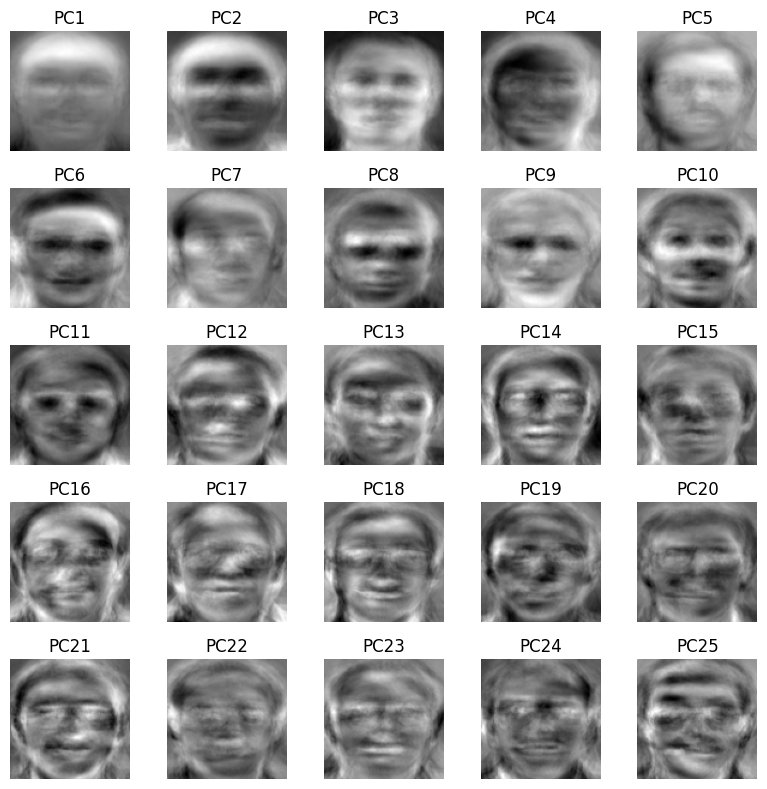

In [6]:
faces = pca.components.reshape((pca.n_components, 100, 100))
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces[i], cmap='binary')
    ax.set_title(f"PC{i+1}")
    ax.axis('off')
save_fig('after_pca')
plt.show()

LƯU DỮ LIỆU LẠI MỘT THƯ MỤC MỚI

In [7]:
from  pathlib import Path

In [9]:
src_root = Path('Datasets')
save_root = Path('PCA_data')
X_reconstructed = pca.recontruct_image(X_pca)
os.makedirs(save_root, exist_ok = True)

In [10]:
for i,path in enumerate(paths):
    path = Path(path)
    person_folder = path.parent.name
    file_name = path.name
    print(f"Saving {path}")
    # save_dir 
    save_dir = save_root/person_folder
    save_dir.mkdir(parents = True,exist_ok = True)

    # get_image 
    img = X_reconstructed[i].reshape(100,100)
    img = np.clip(img,0,255).astype(np.uint8)

    # Save_image with .png
    save_path = save_dir / (file_name.replace('.pgm','.png'))
    cv2.imwrite(str(save_path),img)

Saving Datasets\archive\s1\1.pgm
Saving Datasets\archive\s1\10.pgm
Saving Datasets\archive\s1\2.pgm
Saving Datasets\archive\s1\3.pgm
Saving Datasets\archive\s1\4.pgm
Saving Datasets\archive\s1\5.pgm
Saving Datasets\archive\s1\6.pgm
Saving Datasets\archive\s1\7.pgm
Saving Datasets\archive\s1\8.pgm
Saving Datasets\archive\s1\9.pgm
Saving Datasets\archive\s10\1.pgm
Saving Datasets\archive\s10\10.pgm
Saving Datasets\archive\s10\2.pgm
Saving Datasets\archive\s10\3.pgm
Saving Datasets\archive\s10\4.pgm
Saving Datasets\archive\s10\5.pgm
Saving Datasets\archive\s10\6.pgm
Saving Datasets\archive\s10\7.pgm
Saving Datasets\archive\s10\8.pgm
Saving Datasets\archive\s10\9.pgm
Saving Datasets\archive\s11\1.pgm
Saving Datasets\archive\s11\10.pgm
Saving Datasets\archive\s11\2.pgm
Saving Datasets\archive\s11\3.pgm
Saving Datasets\archive\s11\4.pgm
Saving Datasets\archive\s11\5.pgm
Saving Datasets\archive\s11\6.pgm
Saving Datasets\archive\s11\7.pgm
Saving Datasets\archive\s11\8.pgm
Saving Datasets\archi